# Assignment 1A - Question 2

## Classification

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC, NuSVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from scipy.stats import norm
from sklearn import tree

### Import files
Files imported using pandas.read_csv

Check values using .head()

In [2]:
train = pandas.read_csv('CAB420_Assessment_1A_Data/Data/Q2/training.csv')
test = pandas.read_csv('CAB420_Assessment_1A_Data/Data/Q2/testing.csv')
train.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,39,36,57,91,59,101,93,27,60,...,-2.36,-18.41,-1.88,-6.43,-21.03,-1.60,-6.18,-22.50,-5.20,-7.86
1,h,84,30,57,112,51,98,92,26,62,...,-2.26,-16.27,-1.95,-6.25,-18.79,-1.99,-6.18,-23.41,-8.87,-10.83
2,s,53,25,49,99,51,93,84,26,58,...,-1.46,-15.92,-1.79,-4.64,-17.73,-0.48,-4.69,-19.97,-4.10,-7.07
3,s,59,26,49,103,47,92,82,25,56,...,2.68,-13.77,-2.53,-6.34,-22.03,-2.34,-6.60,-27.10,-7.99,-10.81
4,d,57,49,66,103,64,106,114,28,59,...,-2.94,-21.74,-1.64,-4.62,-23.74,-0.85,-5.50,-22.83,-2.74,-5.84


In [3]:
test.head()

,class,b1,b2,b3,b4,b5,b6,b7,b8,b9,...,pred_minus_obs_H_b9,pred_minus_obs_S_b1,pred_minus_obs_S_b2,pred_minus_obs_S_b3,pred_minus_obs_S_b4,pred_minus_obs_S_b5,pred_minus_obs_S_b6,pred_minus_obs_S_b7,pred_minus_obs_S_b8,pred_minus_obs_S_b9
0,d,67,51,68,115,69,111,136,31,67,...,-9.17,-18.27,-1.80,-6.32,-20.88,-1.63,-6.13,-22.56,-5.53,-8.11
1,s,67,28,51,99,50,97,82,26,59,...,-2.25,-20.13,-2.11,-6.35,-21.94,-1.22,-6.13,-22.20,-3.41,-6.57
2,s,63,26,50,95,49,91,81,26,57,...,-0.44,-17.64,-1.81,-4.70,-19.39,-0.65,-5.01,-20.89,-3.96,-6.85
3,d,63,42,63,97,66,108,111,28,59,...,-2.34,-20.20,-1.89,-5.47,-21.65,-0.99,-5.71,-22.19,-3.41,-6.52
4,s,46,27,50,83,51,90,76,26,56,...,1.25,-18.62,-2.17,-7.11,-21.12,-1.56,-6.35,-22.19,-4.45,-7.32


### Plot data for train and test to Box Plot and standardised Box Plot

Code taken from Week 3 Example 1

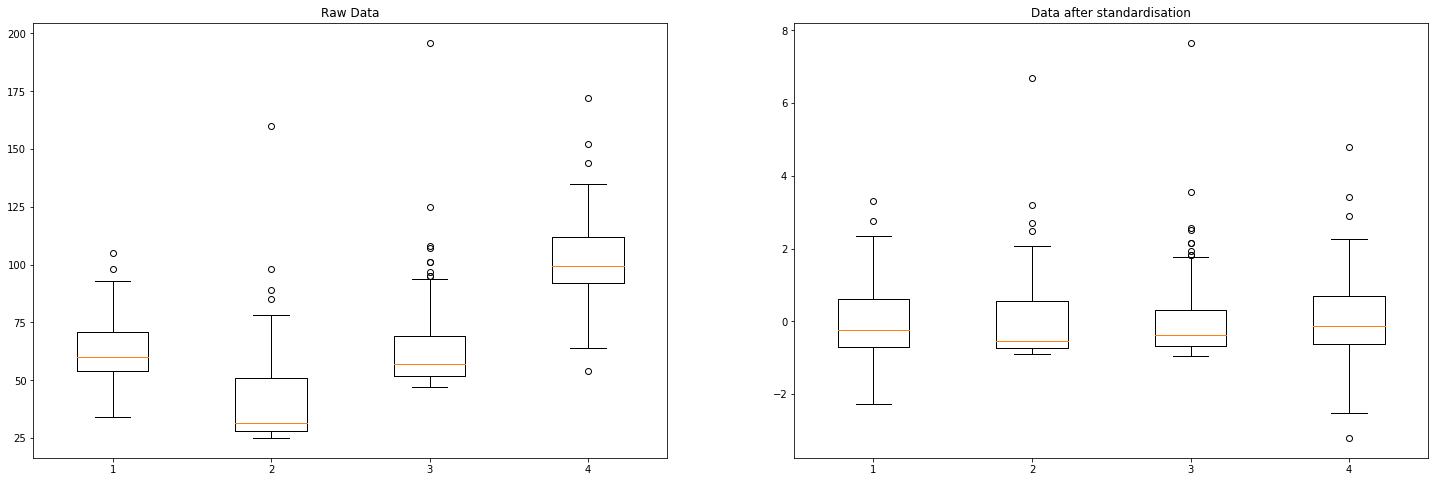

In [4]:
# get the data, we'll just grab 2 dimensions
X = train.iloc[:, 1:5].to_numpy()
train.iloc[:, 0] = train.iloc[:, 0].astype("category")
Y = train.iloc[:, 0].cat.codes.to_numpy()

# plot box plot for the data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X)
ax.set_title('Raw Data')

# standardise data
mu = numpy.mean(X, 0)
sigma = numpy.std(X, 0)
X = (X - mu) / sigma

# box plot after standardisation
ax = fig.add_subplot(1, 2, 2)
ax.boxplot(X)
ax.set_title('Data after standardisation');

X_train = X
Y_train = Y

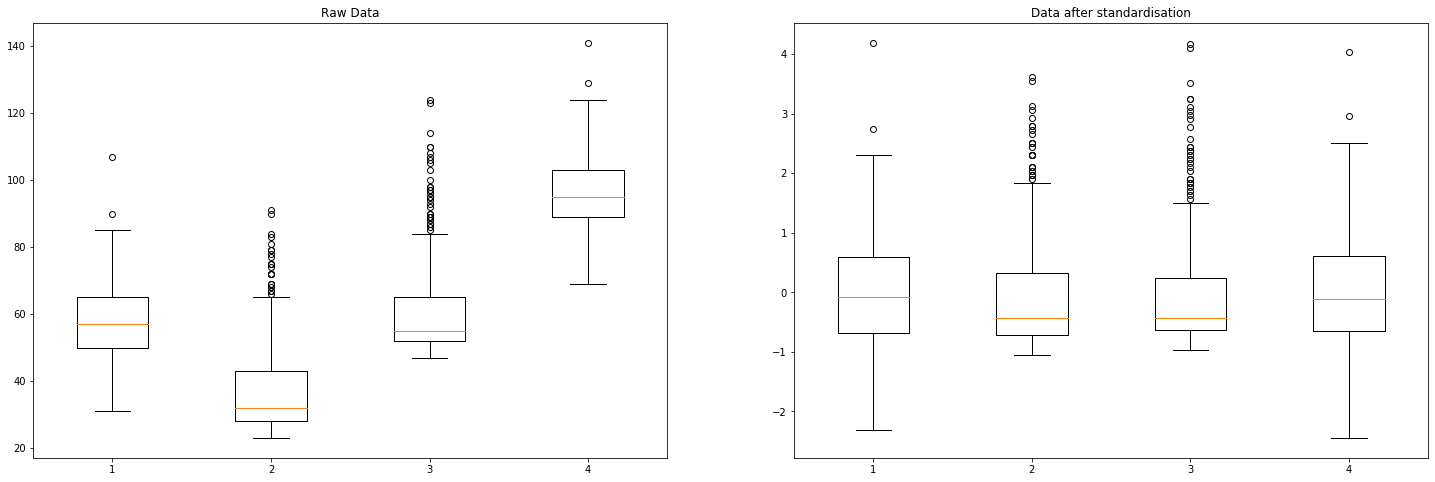

In [5]:
# get the data, we'll just grab 2 dimensions
X = test.iloc[:, 1:5].to_numpy()
test.iloc[:, 0] = test.iloc[:, 0].astype("category")
Y = test.iloc[:, 0].cat.codes.to_numpy()

# plot box plot for the data
fig = plt.figure(figsize=[25, 8])
ax = fig.add_subplot(1, 2, 1)
ax.boxplot(X)
ax.set_title('Raw Data')

# standardise data
mu = numpy.mean(X, 0)
sigma = numpy.std(X, 0)
X = (X - mu) / sigma

# box plot after standardisation
ax = fig.add_subplot(1, 2, 2)
ax.boxplot(X)
ax.set_title('Data after standardisation');

### Split test data into testing and validation sets

Split testing set (50%) and validation set (50%)

Code taken from Week 3 Example 1

In [6]:
X_test, X_val, Y_test, Y_val = train_test_split(X, Y, test_size=0.5, random_state=1)

### Check train and test data to confirm size

In [7]:
X_train.shape

(198, 4)

In [8]:
X_test.shape

(162, 4)

### Evaluate models using confusion matrix

Code taken from Week 3 Example 2

In [9]:
# function to do our eval for us, this is quite simple and will
# - create a figure
# - draw a confusion matrix for the trainign data in a sub-fig on the left
# - draw a confusion matrix for the testing data in a sub-fig on the right
# - compute the overall classification accuracy on the testing data
# this has simply been created as we're going to do this for each test that we run
def eval_model(model, X_train, Y_train, X_test, Y_test):
    fig = plt.figure(figsize=[25, 8])
    ax = fig.add_subplot(1, 2, 1)
    conf = plot_confusion_matrix(model, X_train, Y_train, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_train)
    conf.ax_.set_title('Training Set Performance: ' + str(sum(pred == Y_train)/len(Y_train)));
    ax = fig.add_subplot(1, 2, 2)
    conf = plot_confusion_matrix(model, X_test, Y_test, normalize=None, xticks_rotation='vertical', ax=ax)
    pred = model.predict(X_test)
    conf.ax_.set_title('Testing Set Performance: ' + str(sum(pred == Y_test)/len(Y_test)));

### Evaluate basic SVC model

Code taken from Week 3 Example 2

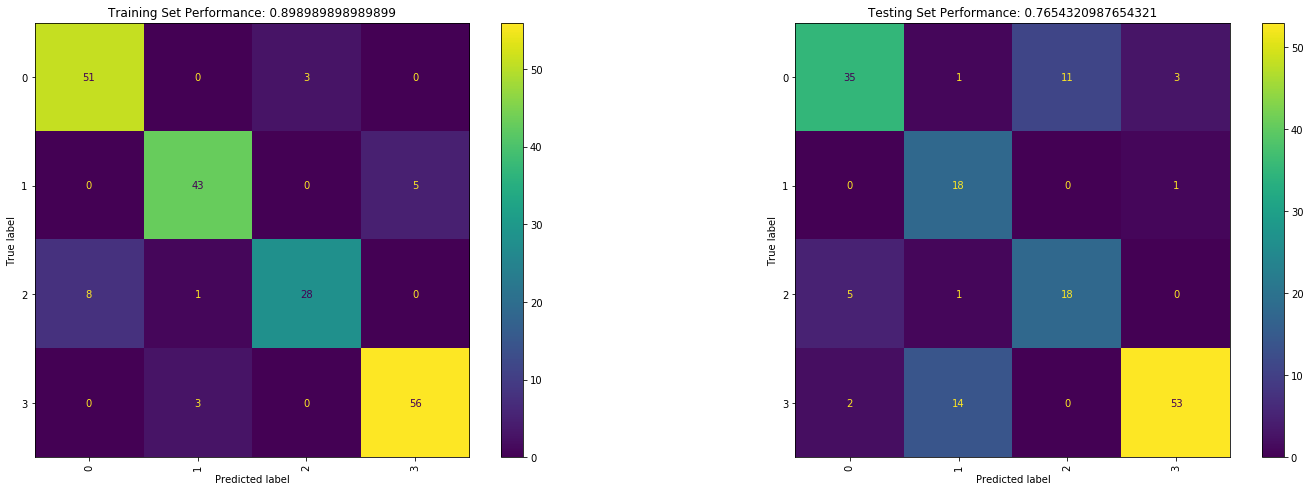

In [10]:
svm = SVC()
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

### Evaluate SVC with balanced class weight

Code taken from Week 3 Example 2

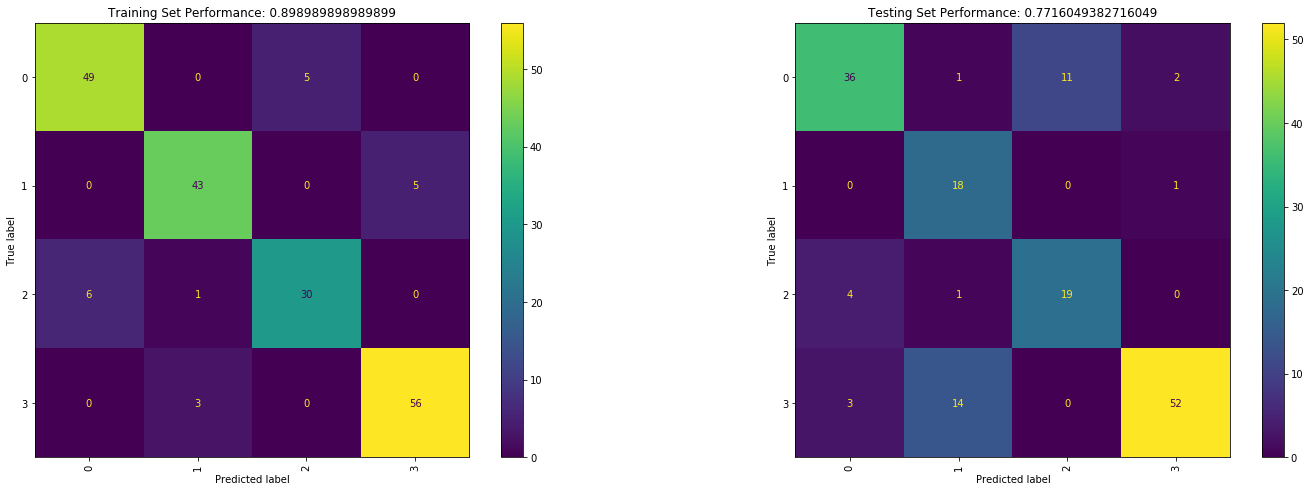

In [11]:
svm = SVC(class_weight='balanced')
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

### Set param grid to find best values

Code taken from Week 3 Example 2


In [12]:
param_grid = [
  {'C': [0.1, 1, 10, 100, 1000], 'kernel': ['linear'],'class_weight': ['balanced','None']},
  {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf'],'class_weight': ['balanced','None']},
  {'C': [0.1, 1, 10, 100, 1000], 'degree': [3, 4, 5, 6], 'kernel': ['poly'],'class_weight': ['balanced','None']},
 ]
svm = SVC()
grid_search = GridSearchCV(svm, param_grid)
grid_search.fit(X_val, Y_val)
grid_search.cv_results_

-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\callm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\callm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: class_weight must be dict, 'balanced', or None, got: 'None'

  FitFailedWarning)
C:\Users\callm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Val

alse, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['linear', 'linear', 'linear', 'linear', 'linear',
                    'linear', 'linear', 'linear', 'linear', 'linear',
                    'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf',
                    'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf',
                    'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf',
                    'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf',
                    'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf', 'rbf',
                    'poly', 'poly', 'poly', 'poly', 'poly', 'poly', 'poly',
                    'poly', 'poly', 'poly', 'poly', 'poly', 'poly', 'poly',
                  

### Use best values found from param grid as values for SVC

Code taken from Week 3 Example 2

{'C': 10, 'class_weight': 'balanced', 'kernel': 'linear'}


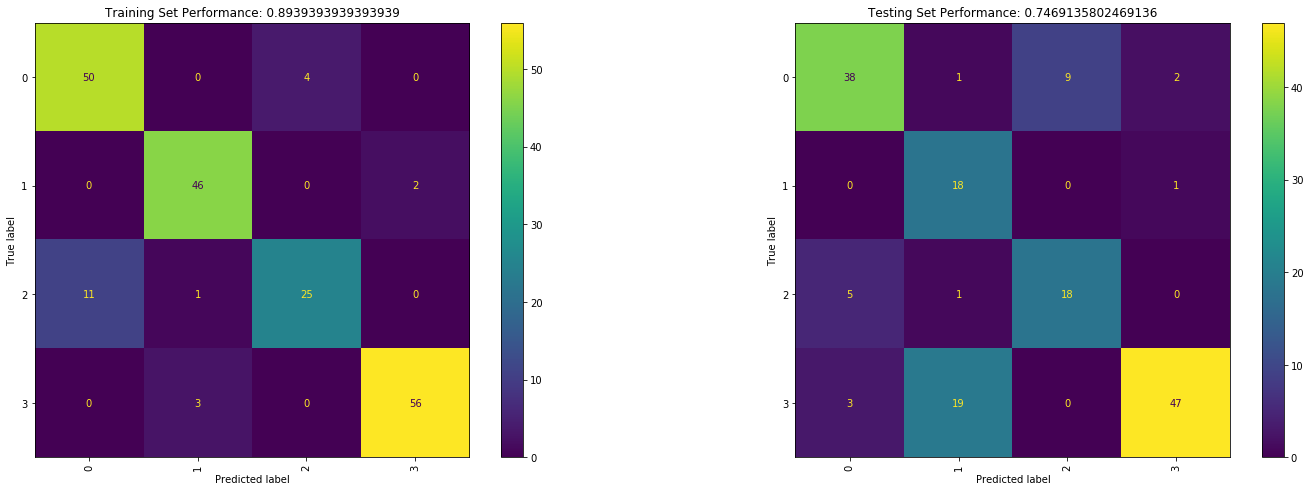

In [13]:
best_system = numpy.argmin(grid_search.cv_results_['rank_test_score'])
params = grid_search.cv_results_['params'][best_system]
print(params)
svm = SVC().set_params(**params)
svm.fit(X_train, Y_train)
eval_model(svm, X_train, Y_train, X_test, Y_test)

### Evaluate model using NuSVC

Code taken from Week 3 Example 2

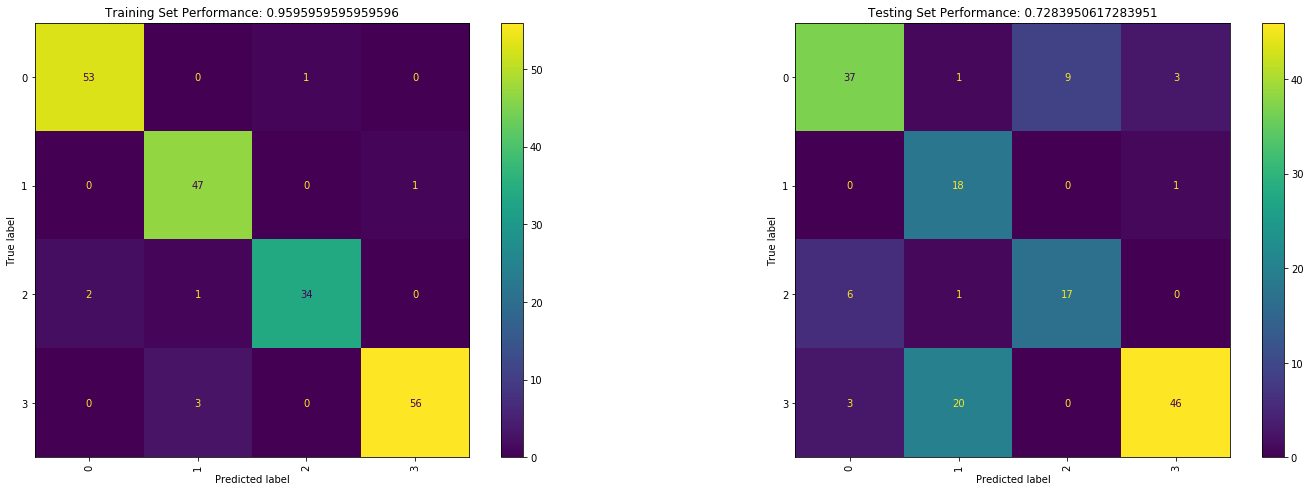

In [14]:
nu_svm = NuSVC(nu=0.15)
nu_svm.fit(X_train, Y_train)
eval_model(nu_svm, X_train, Y_train, X_test, Y_test)

### Evaluate K Nearest Neighbours model

Code taken from Week 3 Example 2

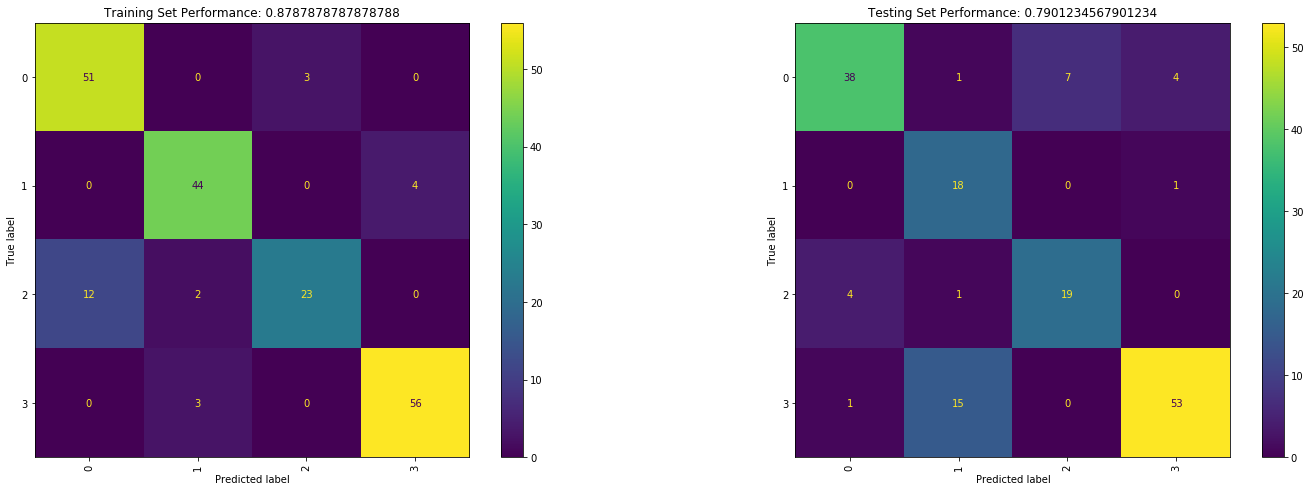

In [15]:
cknn = KNeighborsClassifier(n_neighbors=10)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

### Evaluate K Nearest Neighbours using 10 nearest neighbours 

Code taken from Week 3 Example 2

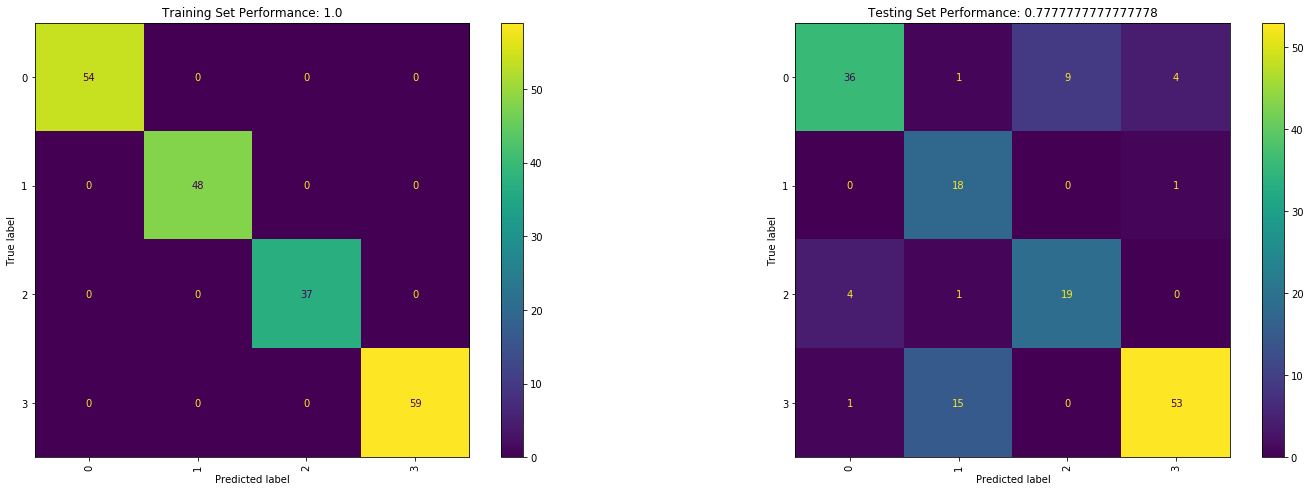

In [16]:
cknn = KNeighborsClassifier(n_neighbors=10, weights='distance')
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

### Find best values for K Nearest Neighbours

Code taken from Week 3 Example 2

In [17]:
cknn = KNeighborsClassifier()
params = {'n_neighbors' : list(range(1,21)), 'weights' : ['uniform', 'distance']}
rand_search = RandomizedSearchCV(cknn, params, n_iter=20)
rand_search.fit(X_val, Y_val)
print(rand_search.cv_results_)

{'mean_fit_time': array([0.00100093, 0.00159645, 0.00140038, 0.00180044, 0.00180106,
       0.00180011, 0.00139904, 0.00140023, 0.00160222, 0.00100007,
       0.00099931, 0.00079837, 0.00120158, 0.00079956, 0.00119801,
       0.0014019 , 0.00160165, 0.00100055, 0.00120239, 0.00120425]), 'std_fit_time': array([4.34000406e-06, 4.88335147e-04, 8.03998844e-04, 4.00391720e-04,
       1.60072195e-03, 7.49554545e-04, 4.90565285e-04, 4.90759335e-04,
       8.00525029e-04, 8.86968386e-07, 6.31957695e-04, 7.46391630e-04,
       7.50573320e-04, 3.99781041e-04, 3.96752483e-04, 8.03948608e-04,
       8.07983834e-04, 1.10395783e-06, 4.04338971e-04, 4.08054077e-04]), 'mean_score_time': array([0.00499916, 0.00520263, 0.00639753, 0.00700097, 0.00719862,
       0.00539989, 0.00520058, 0.00340109, 0.00319715, 0.00280056,
       0.00180349, 0.00179939, 0.00219831, 0.00260487, 0.00240231,
       0.0021997 , 0.00699806, 0.00219879, 0.00579824, 0.00299616]), 'std_score_time': array([0.00126708, 0.00040004, 0

### Evaluate K Nearest Neighbours using best values

Code taken from Week 3 Example 2

{'weights': 'distance', 'n_neighbors': 3}


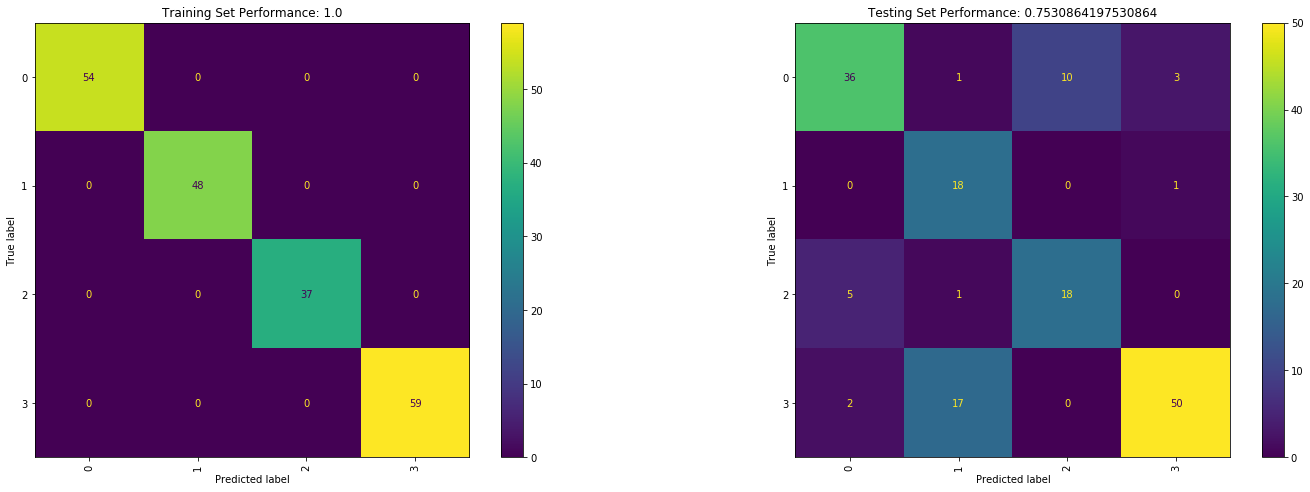

In [18]:
best_system = numpy.argmin(rand_search.cv_results_['rank_test_score'])
params = rand_search.cv_results_['params'][best_system]
print(params)
cknn = KNeighborsClassifier().set_params(**params)
cknn.fit(X_train, Y_train)
eval_model(cknn, X_train, Y_train, X_test, Y_test)

### Evaluate model using Random Forest Classifier

Code taken from Week 3 Example 2

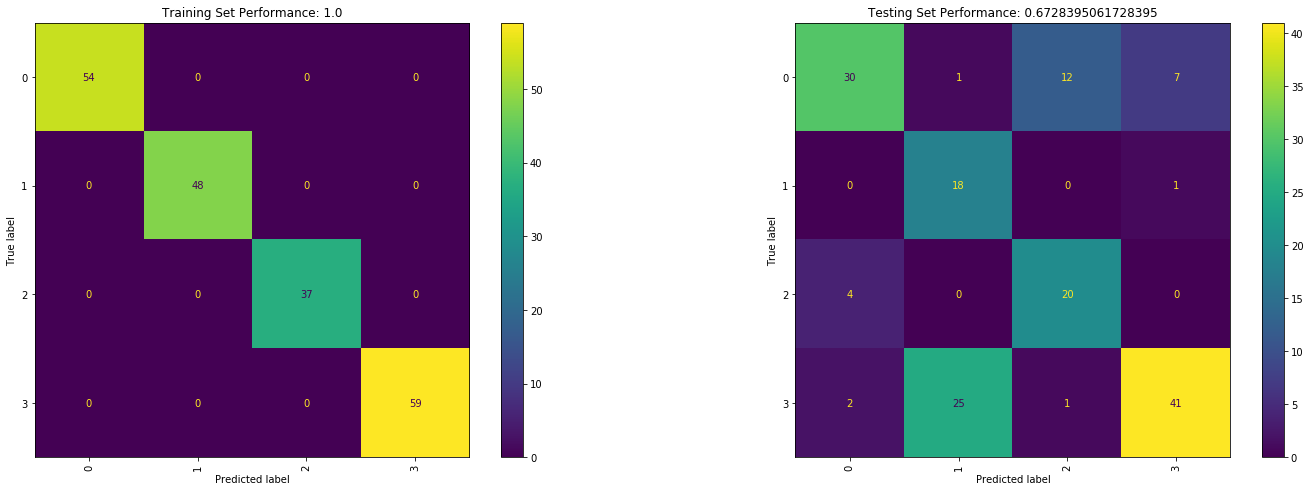

In [19]:
rf = RandomForestClassifier(n_estimators=250, max_depth=15, random_state=0)
rf.fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

### Evaluate Random Forest Classifier using 250 estimators, max depth of 2 and a balanced_subsample class weight

Code taken from Week 3 Example 2

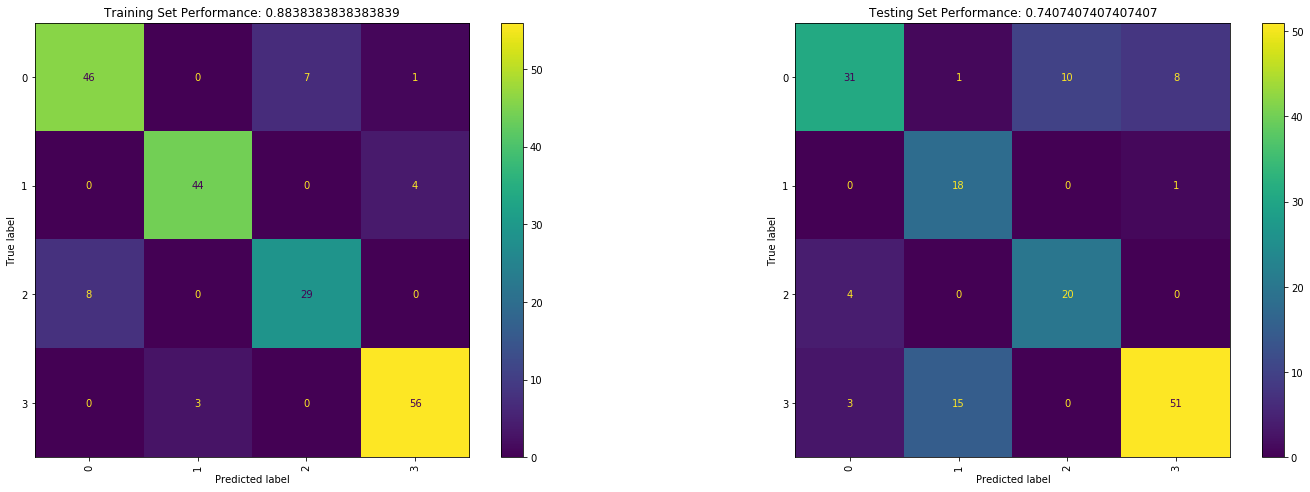

In [20]:
rf = RandomForestClassifier(n_estimators=250, max_depth=2, random_state=0, class_weight='balanced_subsample')
rf.fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

### Evaluate Random Forest Classifier using 250 estimators, max depth of 15 and a balanced_subsample class weight

Code taken from Week 3 Example 2

27
20
27


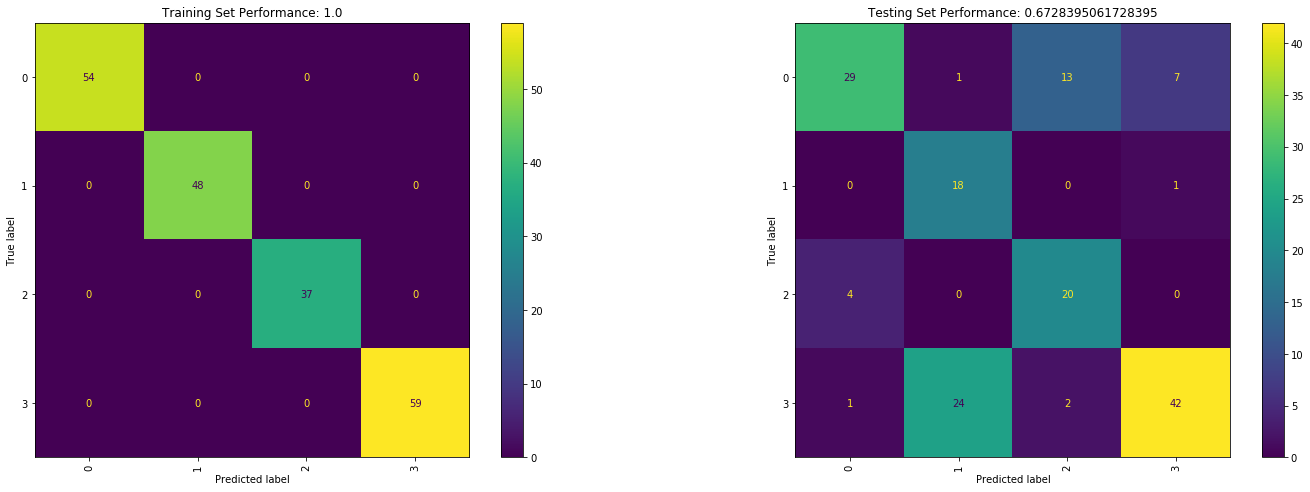

In [21]:
rf = RandomForestClassifier(n_estimators=250, max_depth=15, random_state=0, class_weight='balanced_subsample')
rf.fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)
print(rf.estimators_[0].tree_.n_leaves)
print(rf.estimators_[4].tree_.n_leaves)
print(rf.estimators_[42].tree_.n_leaves)

### Evaluate Random Forest Classifier using 250 estimators, max depth of 15 and a balanced class weight

Code taken from Week 3 Example 2

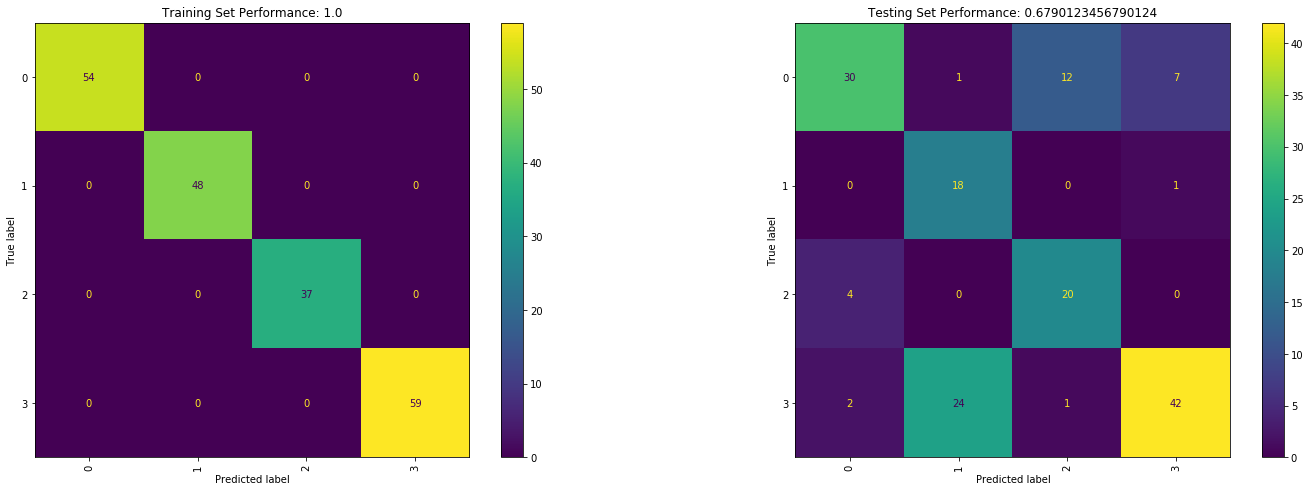

In [22]:
rf = RandomForestClassifier(n_estimators=250, max_depth=15, random_state=0, class_weight='balanced')
rf.fit(X_train, Y_train)
eval_model(rf, X_train, Y_train, X_test, Y_test)

In [23]:
rf = RandomForestClassifier()
rf.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [24]:
rf = RandomForestClassifier()
params = { 'n_estimators' : [1,10,50,100,250],'max_depth' : list(range(1,21)),'class_weight': ['balanced', 'balanced_subsample', 'None']}
grid_search = GridSearchCV(rf, params)
grid_search.fit(X_val, Y_val)
grid_search.cv_results_

:\Users\callm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  FitFailedWarning)
C:\Users\callm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  FitFailedWarning)
C:\Users\callm\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Valid presets for class_weight include "balanced" and "balanced_subsample".Given "None".

  Fi

27273,
        0.75757576, 0.6969697 , 0.75757576, 0.6969697 , 0.72727273,
        0.6969697 , 0.78787879, 0.75757576, 0.75757576, 0.75757576,
        0.66666667, 0.72727273, 0.75757576, 0.75757576, 0.75757576,
        0.60606061, 0.72727273, 0.75757576, 0.75757576, 0.78787879,
        0.60606061, 0.78787879, 0.78787879, 0.75757576, 0.75757576,
        0.75757576, 0.75757576, 0.78787879, 0.75757576, 0.78787879,
        0.66666667, 0.81818182, 0.81818182, 0.78787879, 0.78787879,
        0.72727273, 0.78787879, 0.75757576, 0.72727273, 0.78787879,
        0.63636364, 0.75757576, 0.78787879, 0.81818182, 0.75757576,
        0.72727273, 0.72727273, 0.78787879, 0.81818182, 0.78787879,
        0.66666667, 0.72727273, 0.75757576, 0.84848485, 0.78787879,
        0.63636364, 0.78787879, 0.78787879, 0.78787879, 0.78787879,
        0.66666667, 0.75757576, 0.78787879, 0.78787879, 0.78787879,
        0.75757576, 0.72727273, 0.78787879, 0.81818182, 0.78787879,
        0.63636364, 0.78787879, 0.7272727

In [ ]:
'class_weights': ['balanced', 'balanced_subsample', 'None']